In [39]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

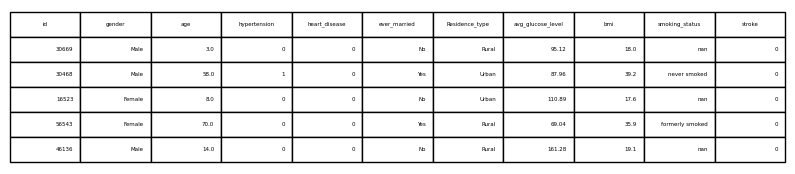

In [41]:
# Read the CSV file
data = pd.read_csv('dataset.csv')
df=data
df.head()

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)
first_few_lines = data.head() 
# Save the first few lines of the dataset as a PNG
fig, ax = plt.subplots(figsize=(10, 2))  
ax.axis('off')
tbl = ax.table(cellText=first_few_lines.values, colLabels=first_few_lines.columns, loc='center')
tbl.scale(1, 1.5)
# output_path = 'first_few_lines_dataset_smote1.png'
# plt.savefig(output_path, bbox_inches='tight', dpi=300)



In [42]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 3.6+ MB


In [45]:
# Label encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

df = df.drop(['id'], axis=1)

In [46]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41938 entries, 0 to 43399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             41938 non-null  int64  
 1   age                41938 non-null  float64
 2   hypertension       41938 non-null  int64  
 3   heart_disease      41938 non-null  int64  
 4   ever_married       41938 non-null  int64  
 5   Residence_type     41938 non-null  int64  
 6   avg_glucose_level  41938 non-null  float64
 7   bmi                41938 non-null  float64
 8   smoking_status     41938 non-null  int64  
 9   stroke             41938 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 3.5 MB


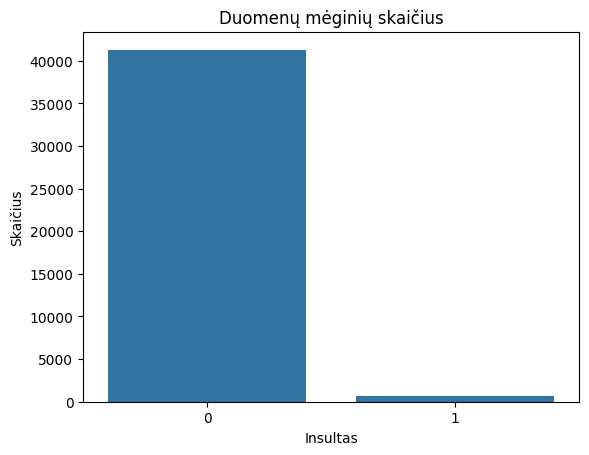

In [47]:
sns.countplot(x = 'stroke', data = df)
plt.title("Duomenų mėginių skaičius")
plt.ylabel("Skaičius")
plt.xlabel("Insultas")
plt.show()

In [48]:
#splitting the data into features and class labels.
X = df.drop(['stroke'],axis = 1)
Y = df['stroke']
counts = Y.value_counts()

# Calculate the percentage of each class
percentages = Y.value_counts(normalize=True) * 100

print("Counts of each class:")
print(counts)

print("\nPercentages of each class:")
print(percentages)

Counts of each class:
stroke
0    41295
1      643
Name: count, dtype: int64

Percentages of each class:
stroke
0    98.466784
1     1.533216
Name: proportion, dtype: float64


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [50]:
train_distribution = Y_train.value_counts() 
print("Training Set Distribution:\n", train_distribution)

test_distribution = Y_test.value_counts() 
print("Testing Set Distribution:\n", test_distribution)

Training Set Distribution:
 stroke
0    28894
1      462
Name: count, dtype: int64
Testing Set Distribution:
 stroke
0    12401
1      181
Name: count, dtype: int64


In [51]:
# 4. Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, Y_train)

# 6. Make predictions
Y_pred = mlp.predict(X_test)

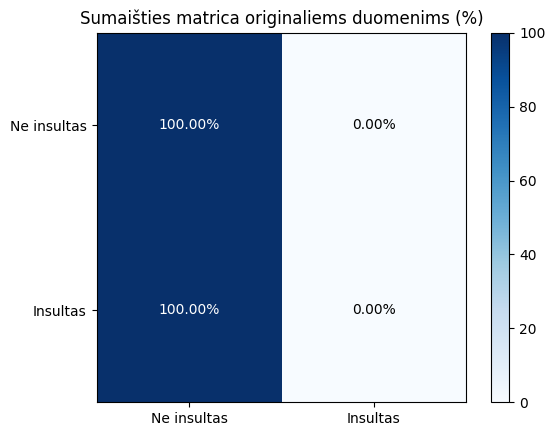

In [52]:
# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create the plot without automatically adding annotations
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=['Ne insultas', 'Insultas'])
fig, ax = plt.subplots()

# Set `include_values=False` to prevent automatic annotations
disp.plot(cmap=plt.cm.Blues, ax=ax, include_values=False)

# Manually add percentage annotations
threshold = cm_percentage.max() / 2.  # For determining text color
for i, row in enumerate(cm_percentage):
    for j, value in enumerate(row):
        color = "white" if value > threshold else "black"  # Text color based on background
        ax.text(j, i, f"{value:.2f}%", ha='center', va='center', color=color)

plt.title('Sumaišties matrica originaliems duomenims (%)')
plt.ylabel("")  # Optionally add ylabel e.g., 'Tikrosios klasės'
plt.xlabel("")  # Optionally add xlabel e.g., 'Nuspėtos klasės'
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


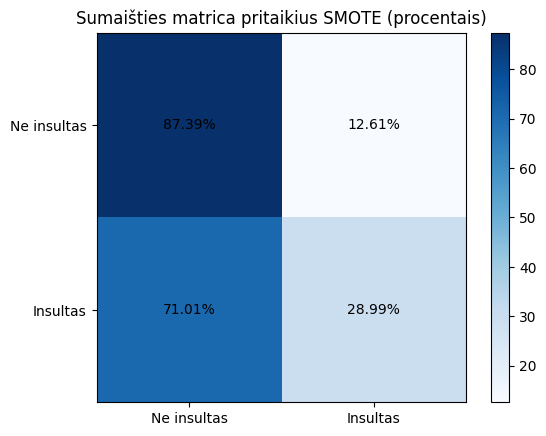

In [55]:
# Read the CSV file
data = pd.read_csv('dataset.csv')
df = data

# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

df.isnull().sum()

# Label encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

df = df.drop(['id'], axis=1)
df = df.dropna()

#splitting the data into features and class labels.
X = df.drop(['stroke'], axis=1)
y = df['stroke']  # Here, we are using 'y' as the target variable (corrected)

# Check the class distribution
counts = y.value_counts()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy=0.99, random_state=7)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the feature values
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Train the MLP model on resampled data
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

# Make predictions
train_preds = mlp.predict(X_train_resampled)
test_preds = mlp.predict(X_test)

# Generate the SMOTE confusion matrix
cm = confusion_matrix(y_test, test_preds)

cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create the confusion matrix plot
fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues)
plt.title('Sumaišties matrica pritaikius SMOTE (procentais)')
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'])
ax.set_yticklabels(['Ne insultas', 'Insultas'])

ax.xaxis.set_ticks_position('bottom')

# Annotating each cell with the percentage values
for (i, j), val in np.ndenumerate(cm_percentage):
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color='black')

plt.show()


MLP Classifier Accuracy after ADASYN:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


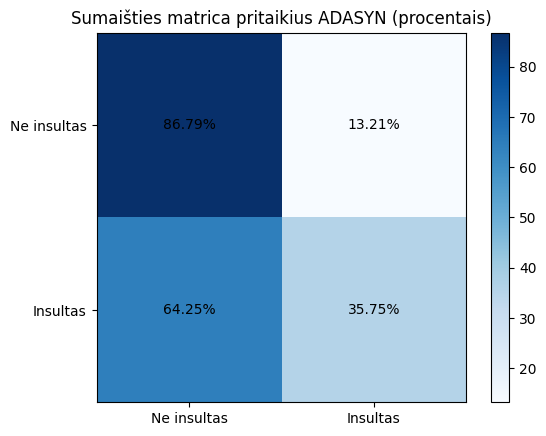

In [58]:
# Read the CSV file
data = pd.read_csv('dataset.csv')
df=data

# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)


df.isnull().sum()

# Label encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

df = df.drop(['id'], axis=1)
df = df.dropna()

#splitting the data into features and class labels.
X = df.drop(['stroke'],axis = 1)
Y = df['stroke']
counts = Y.value_counts()

# Calculate the percentage of each class
percentages = Y.value_counts(normalize=True) * 100

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
train_distribution = Y_train.value_counts() 

test_distribution = Y_test.value_counts() 

X = df.drop(columns=['stroke'])
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9857234)

adasyn = ADASYN(sampling_strategy=0.99, random_state=9857234)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)


# Train the MLP model on resampled data with adasyn
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=9857234)
mlp.fit(X_train_resampled, y_train_resampled)

train_preds = mlp.predict(X_train_resampled)
test_preds = mlp.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train_resampled, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("MLP Classifier Accuracy after ADASYN:")

classification_rep = classification_report(y_test, test_preds, output_dict=True)

classification_df = pd.DataFrame(classification_rep).transpose()

accuracy_value = classification_df.loc['accuracy']['support']
classification_df = classification_df.drop(['accuracy'])
classification_df = classification_df.drop(columns=['support'])


cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues)
plt.title('Sumaišties matrica pritaikius ADASYN (procentais)')
fig.colorbar(cax)

ax.set_xticks(np.arange(2)) 
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'])
ax.set_yticklabels(['Ne insultas', 'Insultas'])

ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color='black')
plt.show()


Train Accuracy: 0.9882986754512387
Test Accuracy: 0.9813225242409792


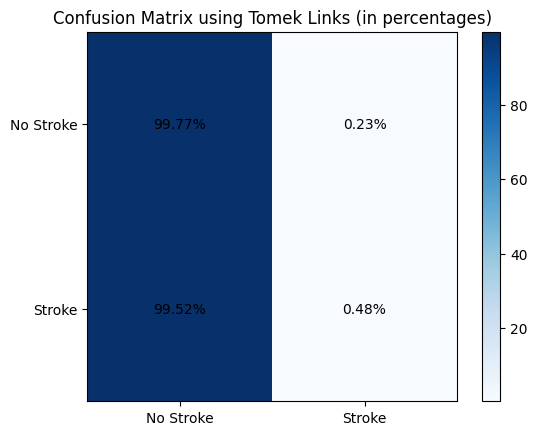

In [ ]:
# Read the CSV file
data = pd.read_csv('dataset.csv')
df=data
file_path = 'dataset.csv'
data = pd.read_csv(file_path)

# Remove extra spaces in column names
df.columns = df.columns.str.strip()

# Label encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

# Dropping the 'id' column if exists
df = df.drop(['id'], axis=1, errors='ignore')

# Dropping missing values
df = df.dropna()

# Splitting the data into features and class labels
X = df.drop(columns=['stroke'])  # Features (dropping the target variable)
y = df['stroke']  # Target (stroke)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Apply Tomek Links to handle class imbalance
tomek = TomekLinks()
X_train_resampled, y_train_resampled = tomek.fit_resample(X_train, y_train)

# Standardize the feature values
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Train the MLP model on resampled data
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

# Make predictions
train_preds = mlp.predict(X_train_resampled)
test_preds = mlp.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train_resampled, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues)
plt.title('Sumaišties matrica panaudojus Tomek nuorodas (procentais)')
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'])
ax.set_yticklabels(['Ne insultas', 'Insultas'])


ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color='black')

plt.show()


Test Accuracy: 0.889445239230647


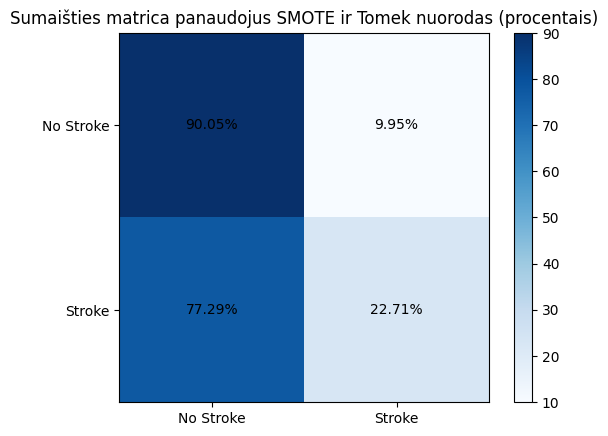

In [60]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Read the CSV file
data = pd.read_csv('dataset.csv')
df = data

# Remove extra spaces in column names
df.columns = df.columns.str.strip()

# Label encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

# Dropping the 'id' column if exists
df = df.drop(['id'], axis=1, errors='ignore')

# Dropping missing values
df = df.dropna()

# Splitting the data into features and class labels
X = df.drop(columns=['stroke'])  # Features (dropping the target variable)
y = df['stroke']  # Target (stroke)

# Splitting the data into train and test sets (only once)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Apply SMOTE + Tomek Links to handle class imbalance
smote_tomek = SMOTETomek(tomek=TomekLinks())
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Standardize the feature values
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Train the MLP model on resampled data
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=7)
mlp.fit(X_train_resampled, y_train_resampled)

# Make predictions
test_preds = mlp.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_preds)
print(f"Test Accuracy: {test_accuracy}")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, test_preds)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues)
plt.title('Sumaišties matrica panaudojus SMOTE ir Tomek nuorodas (procentais)')
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne insultas', 'Insultas'])
ax.set_yticklabels(['Ne insultas', 'Insultas'])

ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color='black')

plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


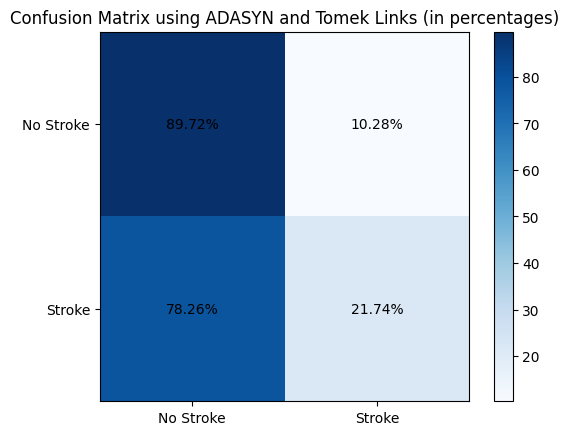

In [67]:

# Read the CSV file
data = pd.read_csv('dataset.csv')
df = data

# Remove extra spaces in column names
df.columns = df.columns.str.strip()

# Label encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

# Drop unnecessary columns and handle missing data
df = df.drop(['id'], axis=1, errors='ignore')
df = df.dropna()

# Split the data into features and target variable
X = df.drop(['stroke'], axis=1)  # Features
y = df['stroke']  # Target variable (stroke)

# Split the dataset into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Apply ADASYN to handle class imbalance (oversampling)
adasyn = ADASYN(sampling_strategy=0.99, random_state=9857234)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Apply Tomek Links to clean the resampled data (undersampling)
tomek = TomekLinks()
X_train_resampled, y_train_resampled = tomek.fit_resample(X_train_resampled, y_train_resampled)

# Standardize the feature values
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Train the MLP model on the resampled data
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=9857234)
mlp.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Display the confusion matrix in percentages
fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues)
plt.title('Confusion Matrix using ADASYN and Tomek Links (in percentages)')
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['No Stroke', 'Stroke'])
ax.set_yticklabels(['No Stroke', 'Stroke'])
ax.xaxis.set_ticks_position('bottom')

# Annotate the matrix with percentage values
for (i, j), val in np.ndenumerate(cm_percentage):
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color='black')

plt.show()

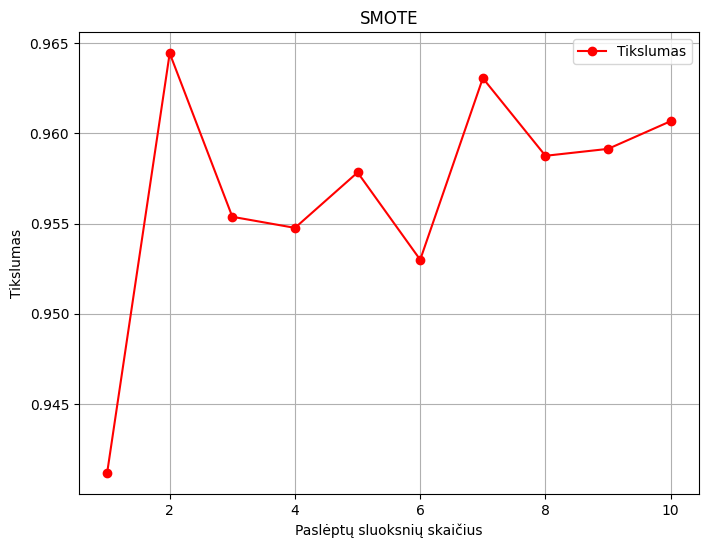

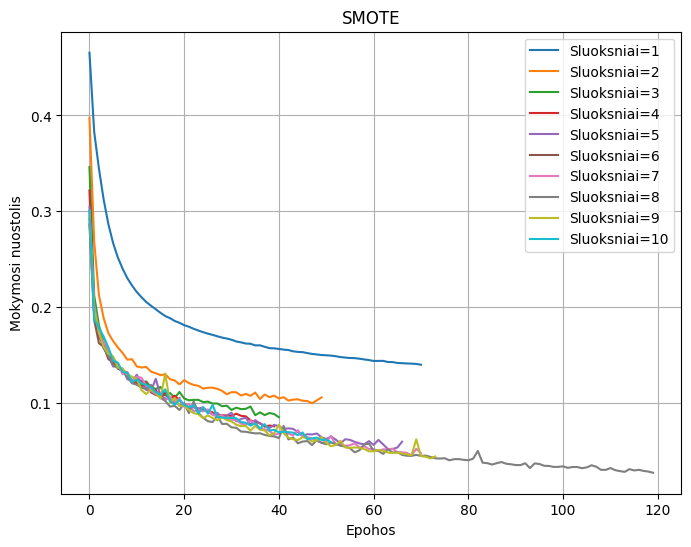

('stroke_mlp_accuracy_SMOTE.png', 'stoke_mlp_loss_curve_SMOTE.png')

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

# Read the CSV file
file_path = 'dataset.csv'  # Update with the correct path if needed
data = pd.read_csv(file_path)
df = data

# Label encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

# Drop unnecessary columns
df = df.drop(['id'], axis=1)

# Handle missing values with SimpleImputer (filling with the mean for numerical columns)
imputer = SimpleImputer(strategy='mean')
X = df.drop(columns=['stroke'])  # Features
X = imputer.fit_transform(X)

y = df['stroke']  # Target

# Split the data into train and test sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# Apply SMOTE to handle class imbalance only on the training data
smote = SMOTE(sampling_strategy=0.99, random_state=7)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize the feature values after SMOTE and before training the model
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)  # Apply the same scaling to test data

# Initialize list to store accuracy values for each number of hidden layers
layers = list(range(1, 11))
accuracies = []
train_losses = []

# Train MLP models with different numbers of hidden layers
for num_layers in layers:
    hidden_layer_sizes = tuple([100] * num_layers)  # Define hidden layer structure (100 units per layer)
    
    # Initialize and train the MLP model
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=300, random_state=7, early_stopping=True)
    mlp.fit(X_train_resampled, y_train_resampled)
    
    # Store the training loss
    train_losses.append(mlp.loss_curve_)
    
    # Make predictions on the test set
    y_pred = mlp.predict(X_test)
    
    # Calculate accuracy and append to list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs number of hidden layers
plt.figure(figsize=(8, 6))
plt.plot(layers, accuracies, marker='o', linestyle='-', color='r', label="Tikslumas")
plt.xlabel("Paslėptų sluoksnių skaičius")
plt.ylabel("Tikslumas")
plt.title("SMOTE")
plt.legend()
plt.grid()
plt.savefig("stroke_mlp_accuracy_SMOTE.png", bbox_inches="tight", dpi=300)
plt.show()

# Plot the Training Loss curve for Different Hidden Layer Configurations
plt.figure(figsize=(8, 6))
for i, loss_curve in enumerate(train_losses):
    plt.plot(loss_curve, label=f'Sluoksniai={layers[i]}')

plt.xlabel("Epohos")
plt.ylabel("Mokymosi nuostolis")
plt.title("SMOTE")
plt.legend()
plt.grid()
plt.savefig("stoke_mlp_loss_curve_SMOTE.png", bbox_inches="tight", dpi=300)
plt.show()

# Optionally, display the saved paths
"stroke_mlp_accuracy_SMOTE.png", "stoke_mlp_loss_curve_SMOTE.png"


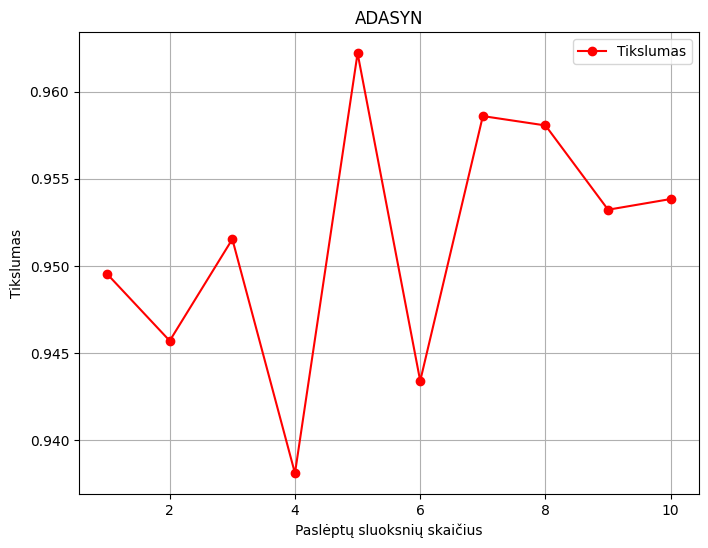

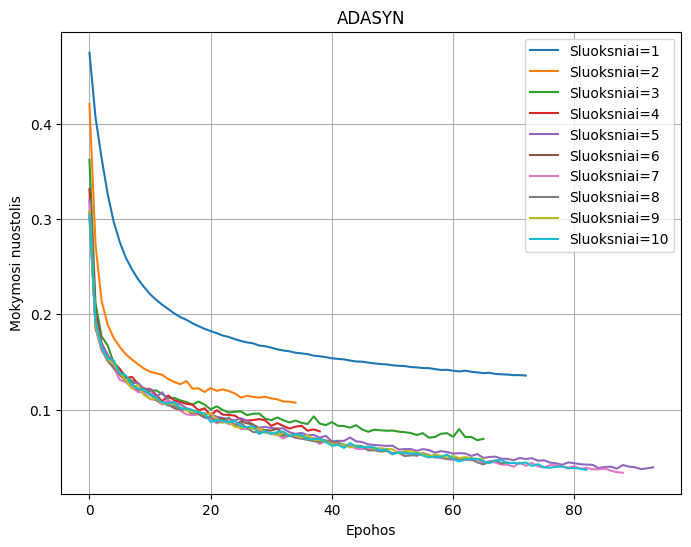

('stroke_mlp_accuracy_ADASYN.png', 'stroke_mlp_loss_curve_ADASYN.png')

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

# Read the CSV file
data = pd.read_csv('dataset.csv')
df = data

# Label encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

# Drop unnecessary columns
df = df.drop(['id'], axis=1)

# Handle missing values with SimpleImputer (filling with the mean for numerical columns)
imputer = SimpleImputer(strategy='mean')
X = df.drop(columns=['stroke'])  # Features
X = imputer.fit_transform(X)

y = df['stroke']  # Target

# Split the data into train and test sets before applying ADASYN
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9857234)

# Apply ADASYN to handle class imbalance only on the training data
adasyn = ADASYN(sampling_strategy=0.99, random_state=9857234)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Standardize the feature values after ADASYN and before training the model
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)  # Apply the same scaling to test data

# Initialize list to store accuracy values for each number of hidden layers
layers = list(range(1, 11))
accuracies = []
train_losses = []

# Train MLP models with different numbers of hidden layers
for num_layers in layers:
    hidden_layer_sizes = tuple([100] * num_layers)  # Define hidden layer structure (100 units per layer)
    
    # Initialize and train the MLP model
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=300, random_state=9857234, early_stopping=True)
    mlp.fit(X_train_resampled, y_train_resampled)
    
    # Store the training loss
    train_losses.append(mlp.loss_curve_)
    
    # Make predictions on the test set
    y_pred = mlp.predict(X_test)
    
    # Calculate accuracy and append to list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs number of hidden layers
plt.figure(figsize=(8, 6))
plt.plot(layers, accuracies, marker='o', linestyle='-', color='r', label="Tikslumas")
plt.xlabel("Paslėptų sluoksnių skaičius")
plt.ylabel("Tikslumas")
plt.title("ADASYN")
plt.legend()
plt.grid()
plt.savefig("stroke_mlp_accuracy_ADASYN.png", bbox_inches="tight", dpi=300)
plt.show()

# Plot the Training Loss curve for Different Hidden Layer Configurations
plt.figure(figsize=(8, 6))
for i, loss_curve in enumerate(train_losses):
    plt.plot(loss_curve, label=f'Sluoksniai={layers[i]}')

plt.xlabel("Epohos")
plt.ylabel("Mokymosi nuostolis")
plt.title("ADASYN")
plt.legend()
plt.grid()
plt.savefig("stroke_mlp_loss_curve_ADASYN.png", bbox_inches="tight", dpi=300)
plt.show()

# Optionally, display the saved paths
"stroke_mlp_accuracy_ADASYN.png", "stroke_mlp_loss_curve_ADASYN.png"


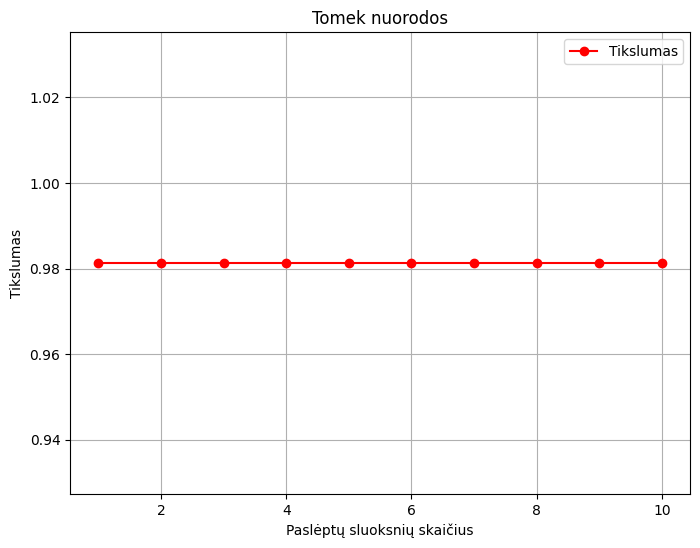

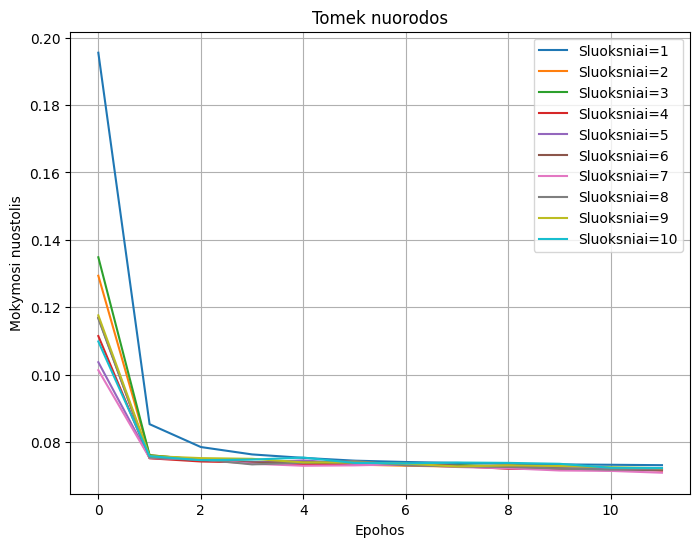

('stroke_mlp_accuracy_Tomek.png', 'stroke_mlp_loss_curve_Tomek.png')

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import TomekLinks
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

# Read the CSV file
data = pd.read_csv('dataset.csv')
df = data

# Label encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

# Drop unnecessary columns
df = df.drop(['id'], axis=1)

# Handle missing values with SimpleImputer (filling with the mean for numerical columns)
imputer = SimpleImputer(strategy='mean')
X = df.drop(columns=['stroke'])  # Features
X = imputer.fit_transform(X)

y = df['stroke']  # Target

# Split the data into train and test sets before applying Tomek Links
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# Apply Tomek Links to handle class imbalance only on the training data
tomek = TomekLinks()
X_train_resampled, y_train_resampled = tomek.fit_resample(X_train, y_train)

# Standardize the feature values after Tomek Links and before training the model
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)  # Apply the same scaling to test data

# Initialize list to store accuracy values for each number of hidden layers
layers = list(range(1, 11))
accuracies = []
train_losses = []

# Train MLP models with different numbers of hidden layers
for num_layers in layers:
    hidden_layer_sizes = tuple([100] * num_layers)  # Define hidden layer structure (100 units per layer)
    
    # Initialize and train the MLP model
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=300, random_state=1000, early_stopping=True)
    mlp.fit(X_train_resampled, y_train_resampled)
    
    # Store the training loss
    train_losses.append(mlp.loss_curve_)
    
    # Make predictions on the test set
    y_pred = mlp.predict(X_test)
    
    # Calculate accuracy and append to list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs number of hidden layers
plt.figure(figsize=(8, 6))
plt.plot(layers, accuracies, marker='o', linestyle='-', color='r', label="Tikslumas")
plt.xlabel("Paslėptų sluoksnių skaičius")
plt.ylabel("Tikslumas")
plt.title("Tomek nuorodos")
plt.legend()
plt.grid()
plt.savefig("stroke_mlp_accuracy_Tomek.png", bbox_inches="tight", dpi=300)
plt.show()

# Plot the Training Loss curve for Different Hidden Layer Configurations
plt.figure(figsize=(8, 6))
for i, loss_curve in enumerate(train_losses):
    plt.plot(loss_curve, label=f'Sluoksniai={layers[i]}')

plt.xlabel("Epohos")
plt.ylabel("Mokymosi nuostolis")
plt.title("Tomek nuorodos")
plt.legend()
plt.grid()
plt.savefig("stroke_mlp_loss_curve_Tomek.png", bbox_inches="tight", dpi=300)
plt.show()

# Optionally, display the saved paths
"stroke_mlp_accuracy_Tomek.png", "stroke_mlp_loss_curve_Tomek.png"


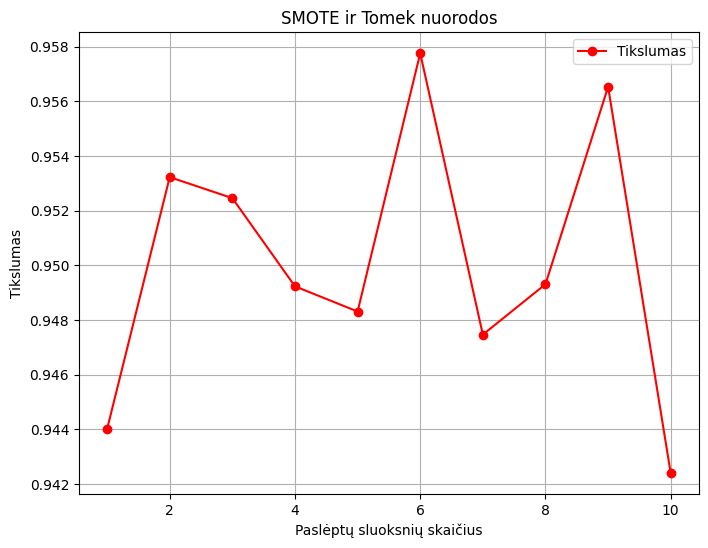

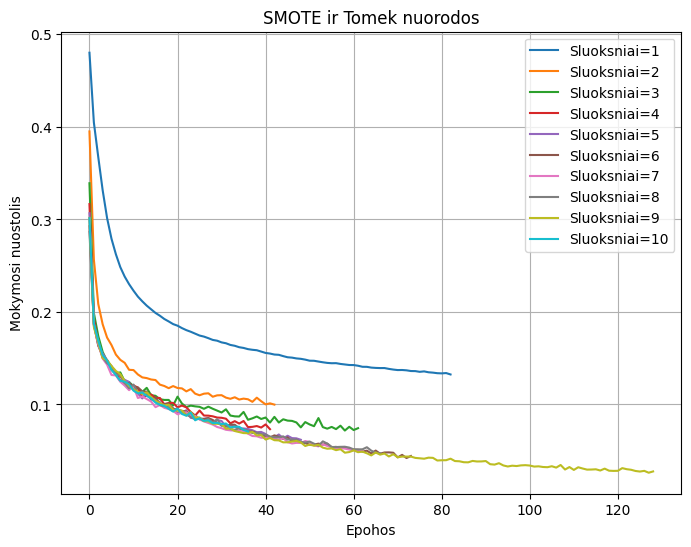

('stroke_mlp_accuracy_SMOTE_Tomek.png',
 'stroke_mlp_loss_curve_SMOTE_Tomek.png')

In [5]:
from imblearn.combine import SMOTETomek  # Correct import

# Read the CSV file
data = pd.read_csv('dataset.csv')
df = data

# Label encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

# Drop unnecessary columns
df = df.drop(['id'], axis=1)

# Handle missing values with SimpleImputer (filling with the mean for numerical columns)
imputer = SimpleImputer(strategy='mean')
X = df.drop(columns=['stroke'])  # Features
X = imputer.fit_transform(X)

y = df['stroke']  # Target

# Split the data into train and test sets before applying SMOTE + Tomek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4294111295)

# Apply SMOTE + Tomek Links to handle class imbalance only on the training data
smote_tomek = SMOTETomek(tomek=TomekLinks())
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Standardize the feature values after SMOTE and before training the model
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)  # Apply the same scaling to test data

# Initialize list to store accuracy values for each number of hidden layers
layers = list(range(1, 11))
accuracies = []
train_losses = []

# Train MLP models with different numbers of hidden layers
for num_layers in layers:
    hidden_layer_sizes = tuple([100] * num_layers)  # Define hidden layer structure (100 units per layer)
    
    # Initialize and train the MLP model
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=300, random_state=4294111295, early_stopping=True)
    mlp.fit(X_train_resampled, y_train_resampled)
    
    # Store the training loss
    train_losses.append(mlp.loss_curve_)
    
    # Make predictions on the test set
    y_pred = mlp.predict(X_test)
    
    # Calculate accuracy and append to list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs number of hidden layers
plt.figure(figsize=(8, 6))
plt.plot(layers, accuracies, marker='o', linestyle='-', color='r', label="Tikslumas")
plt.xlabel("Paslėptų sluoksnių skaičius")
plt.ylabel("Tikslumas")
plt.title("SMOTE ir Tomek nuorodos")
plt.legend()
plt.grid()
plt.savefig("stroke_mlp_accuracy_SMOTE_Tomek.png", bbox_inches="tight", dpi=300)
plt.show()

# Plot the Training Loss curve for Different Hidden Layer Configurations
plt.figure(figsize=(8, 6))
for i, loss_curve in enumerate(train_losses):
    plt.plot(loss_curve, label=f'Sluoksniai={layers[i]}')

plt.xlabel("Epohos")
plt.ylabel("Mokymosi nuostolis")
plt.title("SMOTE ir Tomek nuorodos")
plt.legend()
plt.grid()
plt.savefig("stroke_mlp_loss_curve_SMOTE_Tomek.png", bbox_inches="tight", dpi=300)
plt.show()

# Optionally, display the saved paths
"stroke_mlp_accuracy_SMOTE_Tomek.png", "stroke_mlp_loss_curve_SMOTE_Tomek.png"


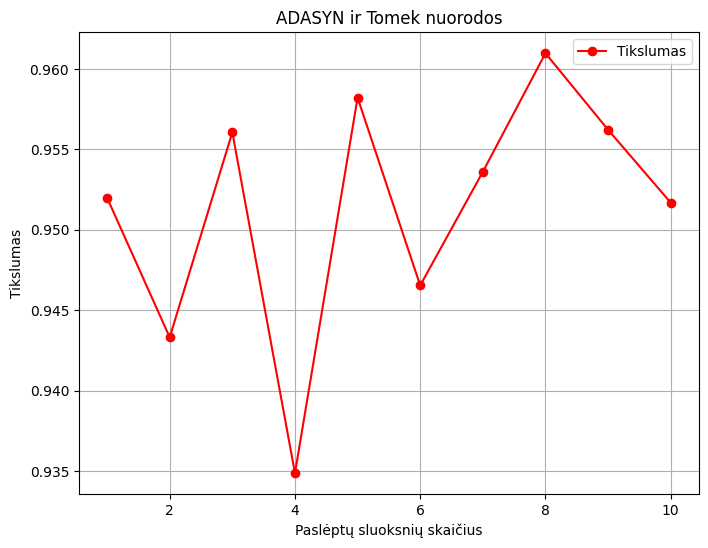

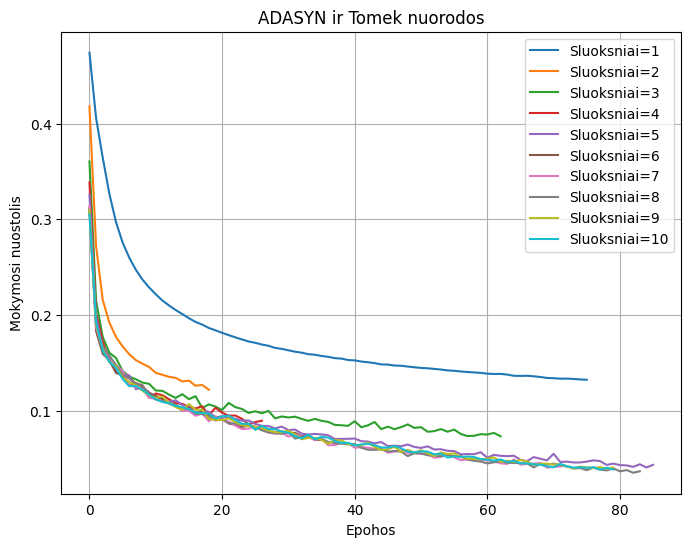

('stroke_mlp_accuracy_ADASYN_Tomek.png',
 'stroke_mlp_loss_curve_SMOTE_Tomek.png')

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

# Read the CSV file
data = pd.read_csv('dataset.csv')
df = data

# Label encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

# Drop unnecessary columns
df = df.drop(['id'], axis=1)

# Handle missing values with SimpleImputer (filling with the mean for numerical columns)
imputer = SimpleImputer(strategy='mean')
X = df.drop(columns=['stroke'])  # Features
X = imputer.fit_transform(X)

y = df['stroke']  # Target

# Split the data into train and test sets before applying ADASYN and Tomek
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9857234)

# Apply ADASYN to handle class imbalance (oversampling)
adasyn = ADASYN(sampling_strategy=0.99, random_state=9857234)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Apply Tomek Links to clean the resampled data (undersampling)
tomek = TomekLinks()
X_train_resampled, y_train_resampled = tomek.fit_resample(X_train_resampled, y_train_resampled)

# Standardize the feature values after resampling
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)  # Apply the same scaling to test data

# Initialize lists to store metrics
layers = list(range(1, 11))
accuracies = []
train_losses = []

# Train MLP models with different numbers of hidden layers
for num_layers in layers:
    hidden_layer_sizes = tuple([100] * num_layers)  # Define hidden layer structure (100 units per layer)
    
    # Initialize and train the MLP model
    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=300, random_state=9857234, early_stopping=True)
    mlp.fit(X_train_resampled, y_train_resampled)
    
    # Store the training loss
    train_losses.append(mlp.loss_curve_)
    
    # Make predictions on the test set
    y_pred = mlp.predict(X_test)
    
    # Calculate accuracy and append to list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs number of hidden layers
plt.figure(figsize=(8, 6))
plt.plot(layers, accuracies, marker='o', linestyle='-', color='r', label="Tikslumas")
plt.xlabel("Paslėptų sluoksnių skaičius")
plt.ylabel("Tikslumas")
plt.title("ADASYN ir Tomek nuorodos")
plt.legend()
plt.grid()
plt.savefig("stroke_mlp_accuracy_ADASYN_Tomek.png", bbox_inches="tight", dpi=300)
plt.show()

# Plot the Training Loss curve for Different Hidden Layer Configurations
plt.figure(figsize=(8, 6))
for i, loss_curve in enumerate(train_losses):
    plt.plot(loss_curve, label=f'Sluoksniai={layers[i]}')

plt.xlabel("Epohos")
plt.ylabel("Mokymosi nuostolis")
plt.title("ADASYN ir Tomek nuorodos")
plt.legend()
plt.grid()
plt.savefig("stroke_mlp_loss_curve_ADASYN_Tomek.png", bbox_inches="tight", dpi=300)
plt.show()

# Optionally, display the saved paths
"stroke_mlp_accuracy_ADASYN_Tomek.png", "stroke_mlp_loss_curve_SMOTE_Tomek.png"



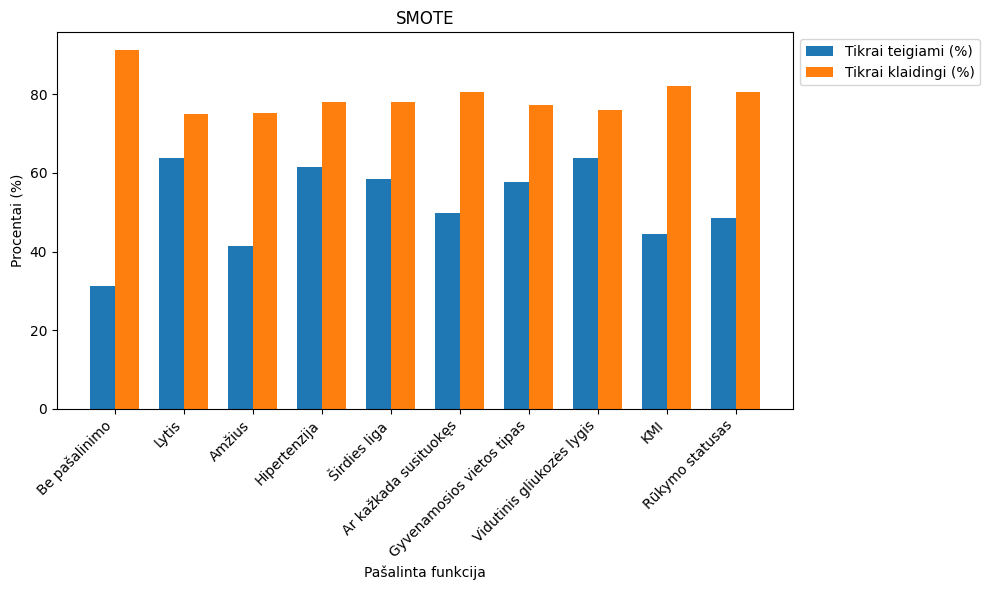

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score  # Import confusion_matrix here
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

# Translate column names to Lithuanian
df.columns = [
    "Id", "Lytis", "Amžius", "Hipertenzija", "Širdies liga", 
    "Ar kažkada susituokęs", "Gyvenamosios vietos tipas", "Vidutinis gliukozės lygis", 
    "KMI", "Rūkymo statusas", "Insultas"
]

df = df.drop(columns=['Id'])
class_counts = df["Insultas"].value_counts()
minority_class = class_counts.idxmin()
num_minority_samples = df[df["Insultas"] == minority_class].shape[0]
df_minority = df[df["Insultas"] == minority_class]
df_majority = df[df["Insultas"] != minority_class]
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)

X = df_balanced.drop(columns=["Insultas"])  # Features
y = df_balanced["Insultas"]  # Target

numeric_columns = X.select_dtypes(include=[np.number]).columns  
categorical_columns = X.select_dtypes(include=['object']).columns  

X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].mean())

# Fill missing values for categorical columns with mode (most frequent value)
for column in categorical_columns:
    X[column] = X[column].fillna(X[column].mode()[0])

label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets before applying SMOTE
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,  test_size=0.3, random_state=7)


# Apply SMOTE only to the training data
smote = SMOTE(sampling_strategy=0.99, random_state=7)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train MLP Classifier without removing any features to get baseline
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=7)
mlp.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Compute confusion matrix for baseline model
cm_baseline = confusion_matrix(y_test, y_pred)

# Calculate percentages for baseline confusion matrix
cm_percentage_baseline = cm_baseline.astype('float') / cm_baseline.sum(axis=1)[:, np.newaxis] * 100
tp_baseline = cm_percentage_baseline[1, 1]  # True Positives (TP)
tn_baseline = cm_percentage_baseline[0, 0]  # True Negatives (TN)

# List of features to remove one by one
features_to_remove = [
    "Lytis", "Amžius", "Hipertenzija", "Širdies liga", 
    "Ar kažkada susituokęs", "Gyvenamosios vietos tipas", "Vidutinis gliukozės lygis", 
    "KMI", "Rūkymo statusas"
]

# Initialize lists to store results
tp_percentages = [tp_baseline]  # Add baseline TP to the list
tn_percentages = [tn_baseline]  # Add baseline TN to the list
accuracies = []
confusion_matrices = []

# Iterate over the features to remove
for feature in features_to_remove:
    # Remove the current feature
    X_temp = X.drop(columns=[feature])
    
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y, test_size=0.3, random_state=900)
    X_train_smote_temp, y_train_smote_temp = smote.fit_resample(X_train_temp, y_train_temp)
    
    # Train MLP Classifier on SMOTE data
    mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=7)
    mlp.fit(X_train_smote_temp, y_train_smote_temp)
    
    # Make predictions on the test set
    y_pred = mlp.predict(X_test_temp)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_temp, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    tp_percentages.append(cm_percentage[1, 1])  # True Positives (TP)
    tn_percentages.append(cm_percentage[0, 0])  # True Negatives (TN)
    
    # Store metrics
    accuracies.append(accuracy_score(y_test_temp, y_pred))
    confusion_matrices.append(cm)


x_labels = ['Be pašalinimo'] + features_to_remove  
width = 0.35  

# Create bar chart for TP and TN percentages
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(np.arange(len(x_labels)), tp_percentages, width, label='Tikrai teigiami (%)')
bar2 = ax.bar(np.arange(len(x_labels)) + width, tn_percentages, width, label='Tikrai klaidingi (%)')
# Add labels and title
ax.set_xlabel('Pašalinta funkcija')
ax.set_ylabel('Procentai (%)')
ax.set_title('SMOTE')

# Set x-ticks with rotation
ax.set_xticks(np.arange(len(x_labels)) + width / 2)
ax.set_xticklabels(x_labels, rotation=45, ha='right')  # Adjust for better readability

# Move legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig("stroke_SMOTE_TP_TN_1.png", dpi=300)
plt.show()


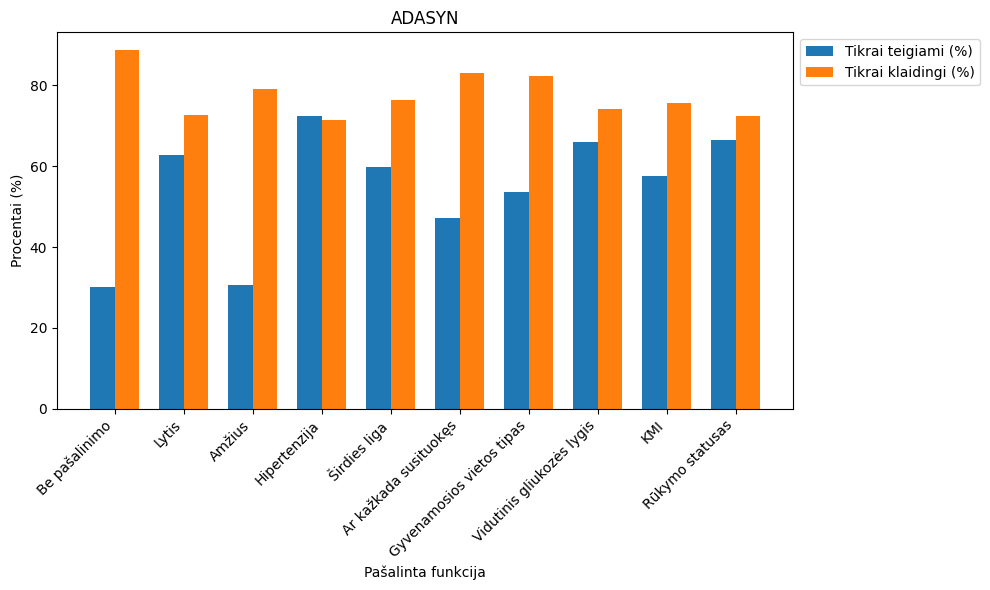

In [8]:
# Load the dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

# Translate column names to Lithuanian
df.columns = [
    "Id", "Lytis", "Amžius", "Hipertenzija", "Širdies liga", 
    "Ar kažkada susituokęs", "Gyvenamosios vietos tipas", "Vidutinis gliukozės lygis", 
    "KMI", "Rūkymo statusas", "Insultas"
]

df = df.drop(columns=['Id'])
class_counts = df["Insultas"].value_counts()
minority_class = class_counts.idxmin()
num_minority_samples = df[df["Insultas"] == minority_class].shape[0]
df_minority = df[df["Insultas"] == minority_class]
df_majority = df[df["Insultas"] != minority_class]
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)

X = df_balanced.drop(columns=["Insultas"])  # Features
y = df_balanced["Insultas"]  # Target

numeric_columns = X.select_dtypes(include=[np.number]).columns  
categorical_columns = X.select_dtypes(include=['object']).columns  

X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].mean())

# Fill missing values for categorical columns with mode (most frequent value)
for column in categorical_columns:
    X[column] = X[column].fillna(X[column].mode()[0])

label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=9857234)

adasyn = ADASYN(sampling_strategy=0.99, random_state=9857234)
X_train_adasyn, y_train_adasyn= adasyn.fit_resample(X_train, y_train)

# Train MLP Classifier without removing any features to get baseline
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=9857234)
mlp.fit(X_train_adasyn, y_train_adasyn)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Compute confusion matrix for baseline model
cm_baseline = confusion_matrix(y_test, y_pred)

# Calculate percentages for baseline confusion matrix
cm_percentage_baseline = cm_baseline.astype('float') / cm_baseline.sum(axis=1)[:, np.newaxis] * 100
tp_baseline = cm_percentage_baseline[1, 1]  # True Positives (TP)
tn_baseline = cm_percentage_baseline[0, 0]  # True Negatives (TN)

# List of features to remove one by one
features_to_remove = [
    "Lytis", "Amžius", "Hipertenzija", "Širdies liga", 
    "Ar kažkada susituokęs", "Gyvenamosios vietos tipas", "Vidutinis gliukozės lygis", 
    "KMI", "Rūkymo statusas"
]

# Initialize lists to store results
tp_percentages = [tp_baseline]  # Add baseline TP to the list
tn_percentages = [tn_baseline]  # Add baseline TN to the list
accuracies = []
confusion_matrices = []

# Iterate over the features to remove
for feature in features_to_remove:
    # Remove the current feature
    X_temp = X.drop(columns=[feature])
    
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y, test_size=0.3, random_state=900)
    X_train_adasyn_temp, y_train_adasyn_temp = adasyn.fit_resample(X_train_temp, y_train_temp)
    
    # Train MLP Classifier on adasyn data
    mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=7)
    mlp.fit(X_train_adasyn_temp, y_train_adasyn_temp)
    
    # Make predictions on the test set
    y_pred = mlp.predict(X_test_temp)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_temp, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    tp_percentages.append(cm_percentage[1, 1])  # True Positives (TP)
    tn_percentages.append(cm_percentage[0, 0])  # True Negatives (TN)
    
    # Store metrics
    accuracies.append(accuracy_score(y_test_temp, y_pred))
    confusion_matrices.append(cm)


x_labels = ['Be pašalinimo'] + features_to_remove  
width = 0.35  

# Create bar chart for TP and TN percentages
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(np.arange(len(x_labels)), tp_percentages, width, label='Tikrai teigiami (%)')
bar2 = ax.bar(np.arange(len(x_labels)) + width, tn_percentages, width, label='Tikrai klaidingi (%)')
# Add labels and title
ax.set_xlabel('Pašalinta funkcija')
ax.set_ylabel('Procentai (%)')
ax.set_title('ADASYN')

# Set x-ticks with rotation
ax.set_xticks(np.arange(len(x_labels)) + width / 2)
ax.set_xticklabels(x_labels, rotation=45, ha='right')  # Adjust for better readability

# Move legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig("stroke_ADASYN_TP_TN.png", dpi=300)
plt.show()


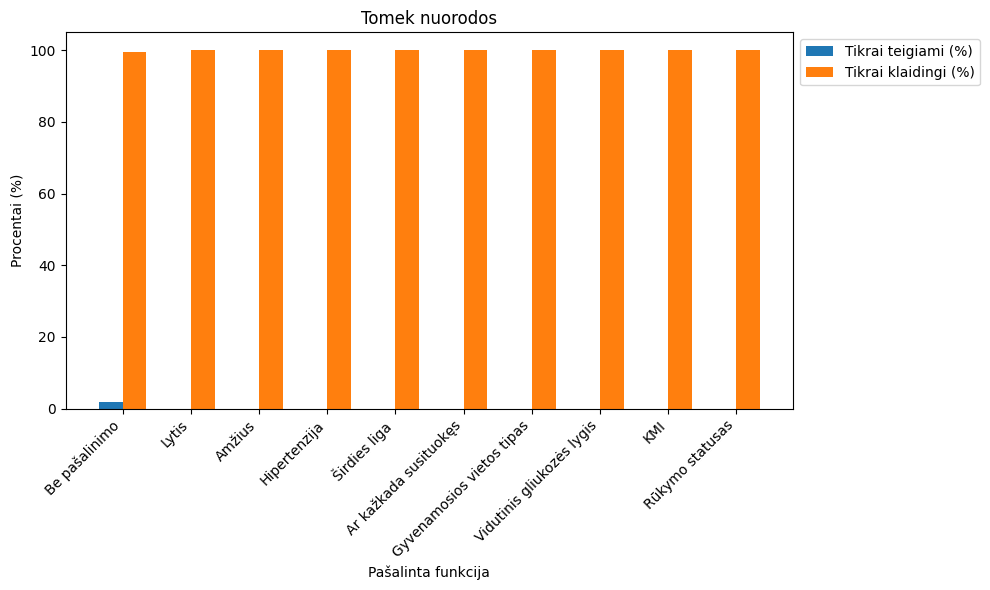

In [9]:
# Load the dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

# Translate column names to Lithuanian
df.columns = [
    "Id", "Lytis", "Amžius", "Hipertenzija", "Širdies liga", 
    "Ar kažkada susituokęs", "Gyvenamosios vietos tipas", "Vidutinis gliukozės lygis", 
    "KMI", "Rūkymo statusas", "Insultas"
]

df = df.drop(columns=['Id'])
class_counts = df["Insultas"].value_counts()
minority_class = class_counts.idxmin()
num_minority_samples = df[df["Insultas"] == minority_class].shape[0]
df_minority = df[df["Insultas"] == minority_class]
df_majority = df[df["Insultas"] != minority_class]
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)

X = df_balanced.drop(columns=["Insultas"])  # Features
y = df_balanced["Insultas"]  # Target

numeric_columns = X.select_dtypes(include=[np.number]).columns  
categorical_columns = X.select_dtypes(include=['object']).columns  

X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].mean())

# Fill missing values for categorical columns with mode (most frequent value)
for column in categorical_columns:
    X[column] = X[column].fillna(X[column].mode()[0])

label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1000)

# Apply Tomek Links to handle class imbalance
Tomek = TomekLinks()
X_train_Tomek, y_train_Tomek = Tomek.fit_resample(X_train, y_train)

# Standardize the feature values
scaler = StandardScaler()
X_train_Tomek = scaler.fit_transform(X_train_Tomek)
X_test = scaler.transform(X_test)


# Train the MLP model on resampled data
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=1000)
mlp.fit(X_train_Tomek, y_train_Tomek)
# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Compute confusion matrix for baseline model
cm_baseline = confusion_matrix(y_test, y_pred)

# Calculate percentages for baseline confusion matrix
cm_percentage_baseline = cm_baseline.astype('float') / cm_baseline.sum(axis=1)[:, np.newaxis] * 100
tp_baseline = cm_percentage_baseline[1, 1]  # True Positives (TP)
tn_baseline = cm_percentage_baseline[0, 0]  # True Negatives (TN)

# List of features to remove one by one
features_to_remove = [
    "Lytis", "Amžius", "Hipertenzija", "Širdies liga", 
    "Ar kažkada susituokęs", "Gyvenamosios vietos tipas", "Vidutinis gliukozės lygis", 
    "KMI", "Rūkymo statusas"
]

# Initialize lists to store results
tp_percentages = [tp_baseline]  # Add baseline TP to the list
tn_percentages = [tn_baseline]  # Add baseline TN to the list
accuracies = []
confusion_matrices = []

# Iterate over the features to remove
for feature in features_to_remove:
    # Remove the current feature
    X_temp = X.drop(columns=[feature])
    
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y, test_size=0.3, random_state=900)
    X_train_Tomek_temp, y_train_Tomek_temp = Tomek.fit_resample(X_train_temp, y_train_temp)
    
    # Train MLP Classifier on Tomek data
    mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=7)
    mlp.fit(X_train_Tomek_temp, y_train_Tomek_temp)
    
    # Make predictions on the test set
    y_pred = mlp.predict(X_test_temp)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_temp, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    tp_percentages.append(cm_percentage[1, 1])  # True Positives (TP)
    tn_percentages.append(cm_percentage[0, 0])  # True Negatives (TN)
    
    # Store metrics
    accuracies.append(accuracy_score(y_test_temp, y_pred))
    confusion_matrices.append(cm)


x_labels = ['Be pašalinimo'] + features_to_remove  
width = 0.35  

# Create bar chart for TP and TN percentages
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(np.arange(len(x_labels)), tp_percentages, width, label='Tikrai teigiami (%)')
bar2 = ax.bar(np.arange(len(x_labels)) + width, tn_percentages, width, label='Tikrai klaidingi (%)')
# Add labels and title
ax.set_xlabel('Pašalinta funkcija')
ax.set_ylabel('Procentai (%)')
ax.set_title('Tomek nuorodos')

# Set x-ticks with rotation
ax.set_xticks(np.arange(len(x_labels)) + width / 2)
ax.set_xticklabels(x_labels, rotation=45, ha='right')  # Adjust for better readability

# Move legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig("stroke_Tomek_TP_TN.png", dpi=300)
plt.show()


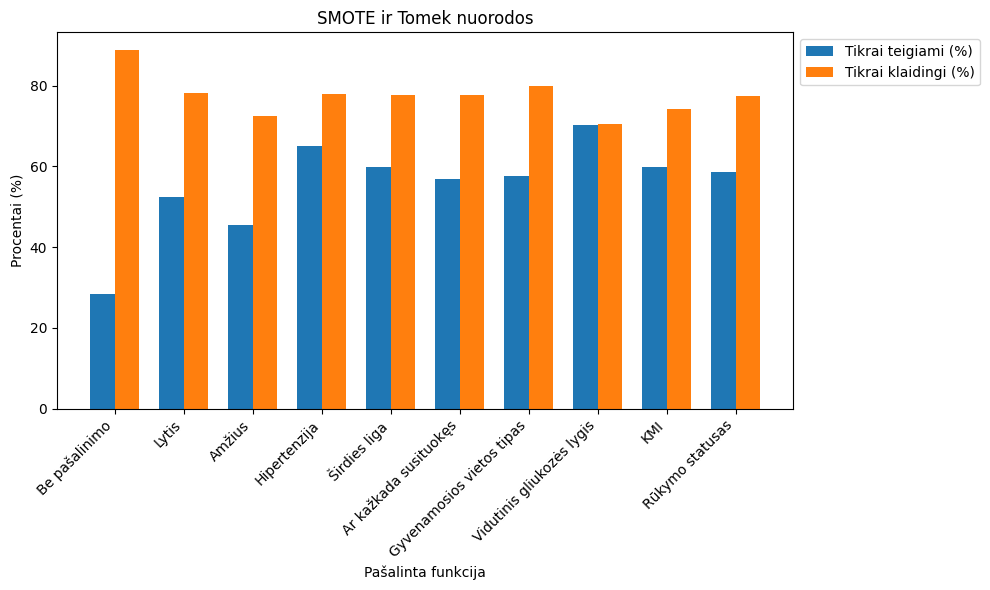

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import numpy as np

# Load the dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Translate column names to Lithuanian
df.columns = [
    "Id", "Lytis", "Amžius", "Hipertenzija", "Širdies liga", 
    "Ar kažkada susituokęs", "Gyvenamosios vietos tipas", "Vidutinis gliukozės lygis", 
    "KMI", "Rūkymo statusas", "Insultas"
]

df = df.drop(columns=['Id'])  # Drop 'Id' column
class_counts = df["Insultas"].value_counts()

# Identify the minority class
minority_class = class_counts.idxmin()

# Create balanced dataset by combining minority and majority classes
num_minority_samples = df[df["Insultas"] == minority_class].shape[0]
df_minority = df[df["Insultas"] == minority_class]
df_majority = df[df["Insultas"] != minority_class]
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)

# Define features and target
X = df_balanced.drop(columns=["Insultas"])  # Features
y = df_balanced["Insultas"]  # Target

# Handle missing values
numeric_columns = X.select_dtypes(include=[np.number]).columns  
categorical_columns = X.select_dtypes(include=['object']).columns  

X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].mean())
for column in categorical_columns:
    X[column] = X[column].fillna(X[column].mode()[0])

# Encode categorical variables
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=9857234)

# Apply SMOTETomek to handle class imbalance (SMOTE + Tomek Links)
smote_tomek = SMOTETomek(tomek=TomekLinks())
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Standardize the resampled training set
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=9857234)
mlp.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Compute confusion matrix
cm_baseline = confusion_matrix(y_test, y_pred)

# Calculate percentages for confusion matrix
cm_percentage_baseline = cm_baseline.astype('float') / cm_baseline.sum(axis=1)[:, np.newaxis] * 100
tp_baseline = cm_percentage_baseline[1, 1]  # True Positives (TP)
tn_baseline = cm_percentage_baseline[0, 0]  # True Negatives (TN)

# List of features to remove one by one
features_to_remove = [
    "Lytis", "Amžius", "Hipertenzija", "Širdies liga", 
    "Ar kažkada susituokęs", "Gyvenamosios vietos tipas", "Vidutinis gliukozės lygis", 
    "KMI", "Rūkymo statusas"
]

# Initialize lists to store results
tp_percentages = [tp_baseline]  # Add baseline TP to the list
tn_percentages = [tn_baseline]  # Add baseline TN to the list
accuracies = []
confusion_matrices = []

# Iterate over the features to remove
for feature in features_to_remove:
    # Remove the current feature
    X_temp = X.drop(columns=[feature])
    
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y, test_size=0.3, random_state=900)
    X_train_resampled_temp, y_train_resampled_temp = smote_tomek.fit_resample(X_train_temp, y_train_temp)
    
    # Train MLP Classifier on resampled data
    mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=7)
    mlp.fit(X_train_resampled_temp, y_train_resampled_temp)
    
    # Make predictions on the test set
    y_pred = mlp.predict(X_test_temp)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_temp, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    tp_percentages.append(cm_percentage[1, 1])  # True Positives (TP)
    tn_percentages.append(cm_percentage[0, 0])  # True Negatives (TN)
    
    # Store metrics
    accuracies.append(accuracy_score(y_test_temp, y_pred))
    confusion_matrices.append(cm)

# Plot TP and TN percentages for each feature
x_labels = ['Be pašalinimo'] + features_to_remove  
width = 0.35  

# Create bar chart for TP and TN percentages
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(np.arange(len(x_labels)), tp_percentages, width, label='Tikrai teigiami (%)')
bar2 = ax.bar(np.arange(len(x_labels)) + width, tn_percentages, width, label='Tikrai klaidingi (%)')
# Add labels and title
ax.set_xlabel('Pašalinta funkcija')
ax.set_ylabel('Procentai (%)')
ax.set_title('SMOTE ir Tomek nuorodos')

# Set x-ticks with rotation
ax.set_xticks(np.arange(len(x_labels)) + width / 2)
ax.set_xticklabels(x_labels, rotation=45, ha='right')  # Adjust for better readability

# Move legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig("stroke_SMOTETomek_TP_TN.png", dpi=300)
plt.show()


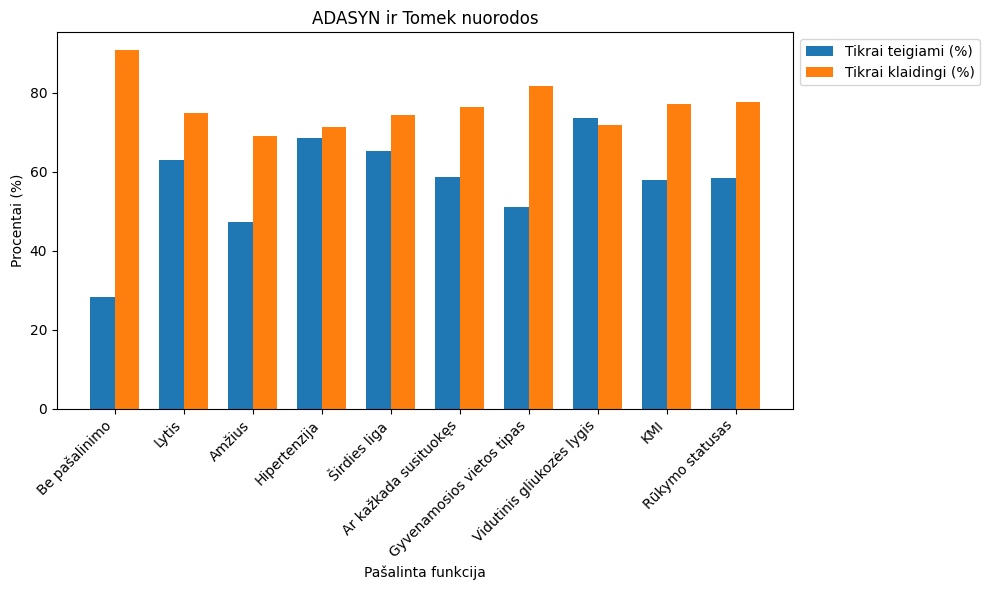

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks
import numpy as np

# Load the dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Translate column names to Lithuanian
df.columns = [
    "Id", "Lytis", "Amžius", "Hipertenzija", "Širdies liga", 
    "Ar kažkada susituokęs", "Gyvenamosios vietos tipas", "Vidutinis gliukozės lygis", 
    "KMI", "Rūkymo statusas", "Insultas"
]

# Drop the "Id" column as it is not needed
df = df.drop(columns=['Id'])

# Check class distribution before modification
class_counts = df["Insultas"].value_counts()
minority_class = class_counts.idxmin()

# Get the number of available minority class samples
num_minority_samples = df[df["Insultas"] == minority_class].shape[0]

# Use all available minority class samples if they are fewer than the desired amount
df_minority = df[df["Insultas"] == minority_class]
df_majority = df[df["Insultas"] != minority_class]

# Combine the new dataset
df_balanced = pd.concat([df_majority, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)

# Define features and target for the balanced dataset
X = df_balanced.drop(columns=["Insultas"])  # Features
y = df_balanced["Insultas"]  # Target

# Handle missing values for numeric columns with mean and for categorical columns with mode
numeric_columns = X.select_dtypes(include=[np.number]).columns  
categorical_columns = X.select_dtypes(include=['object']).columns  

X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].mean())

# Fill missing values for categorical columns with mode (most frequent value)
for column in categorical_columns:
    X[column] = X[column].fillna(X[column].mode()[0])

# Label encoding for categorical variables
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=98)

# Apply ADASYN to handle class imbalance (oversampling)
adasyn = ADASYN(sampling_strategy=0.99, random_state=9857234)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Apply Tomek Links to clean the resampled data (undersampling)
tomek = TomekLinks()
X_train_resampled, y_train_resampled = tomek.fit_resample(X_train_resampled, y_train_resampled)

# Standardize the feature values after applying ADASYN and Tomek Links
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Train the MLP model on the resampled data
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=98)
mlp.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = mlp.predict(X_test)

# Compute confusion matrix for baseline model
cm_baseline = confusion_matrix(y_test, y_pred)

# Calculate percentages for baseline confusion matrix
cm_percentage_baseline = cm_baseline.astype('float') / cm_baseline.sum(axis=1)[:, np.newaxis] * 100
tp_baseline = cm_percentage_baseline[1, 1]  # True Positives (TP)
tn_baseline = cm_percentage_baseline[0, 0]  # True Negatives (TN)

# List of features to remove one by one
features_to_remove = [
    "Lytis", "Amžius", "Hipertenzija", "Širdies liga", 
    "Ar kažkada susituokęs", "Gyvenamosios vietos tipas", "Vidutinis gliukozės lygis", 
    "KMI", "Rūkymo statusas"
]

# Initialize lists to store results
tp_percentages = [tp_baseline]  # Add baseline TP to the list
tn_percentages = [tn_baseline]  # Add baseline TN to the list
accuracies = []
confusion_matrices = []

# Iterate over the features to remove
for feature in features_to_remove:
    # Remove the current feature
    X_temp = X.drop(columns=[feature])
    
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y, test_size=0.3, random_state=98525634)
    X_train_resampled_temp, y_train_resampled_temp = adasyn.fit_resample(X_train_temp, y_train_temp)
    
    # Apply Tomek Links to clean the resampled data
    X_train_resampled_temp, y_train_resampled_temp = tomek.fit_resample(X_train_resampled_temp, y_train_resampled_temp)
    
    # Train MLP Classifier on SMOTE and Tomek data
    mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=98572634)
    mlp.fit(X_train_resampled_temp, y_train_resampled_temp)
    
    # Make predictions on the test set
    y_pred = mlp.predict(X_test_temp)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test_temp, y_pred)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    tp_percentages.append(cm_percentage[1, 1])  # True Positives (TP)
    tn_percentages.append(cm_percentage[0, 0])  # True Negatives (TN)
    
    # Store metrics
    accuracies.append(accuracy_score(y_test_temp, y_pred))
    confusion_matrices.append(cm)

# Plot results
x_labels = ['Be pašalinimo'] + features_to_remove  
width = 0.35  # Bar width

# Create bar chart for TP and TN percentages
fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(np.arange(len(x_labels)), tp_percentages, width, label='Tikrai teigiami (%)')
bar2 = ax.bar(np.arange(len(x_labels)) + width, tn_percentages, width, label='Tikrai klaidingi (%)')

# Add labels and title
ax.set_xlabel('Pašalinta funkcija')
ax.set_ylabel('Procentai (%)')
ax.set_title('ADASYN ir Tomek nuorodos')

# Set x-ticks with rotation
ax.set_xticks(np.arange(len(x_labels)) + width / 2)
ax.set_xticklabels(x_labels, rotation=45, ha='right')  # Adjust for better readability

# Move legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig("stroke_ADASYN_Tomek_TP_TN.png", dpi=300)
plt.show()
